In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


# Dataset with the Answers

In [82]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [83]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [84]:
# The following lines will display all the content in columns and rows of the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Dataset with the questions

In [85]:
df_schema = pd.read_csv('./survey_results_schema.csv')
df_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?


# Data Analysis

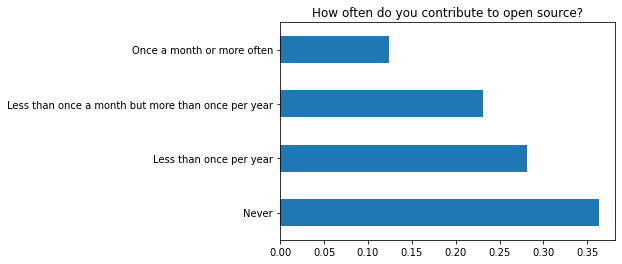

In [86]:
open_sourcer = df['OpenSourcer'].value_counts()

(open_sourcer/df.shape[0]).plot(kind="barh");
plt.title("How often do you contribute to open source?");

Remove the people who never contribute to Open Source to analyze the characteristics of people who contribute.

In [87]:
# Extract people that contributed to Opensource al least once
open_source = df[df['OpenSourcer'] != 'Never']

In [88]:
open_source.shape

(56588, 85)

In [89]:
open_source.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than proprietary / closed source software","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,A lot more welcome now than last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software is about the same,Employed full-time,New Zealand,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech meetups or events in your area,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult


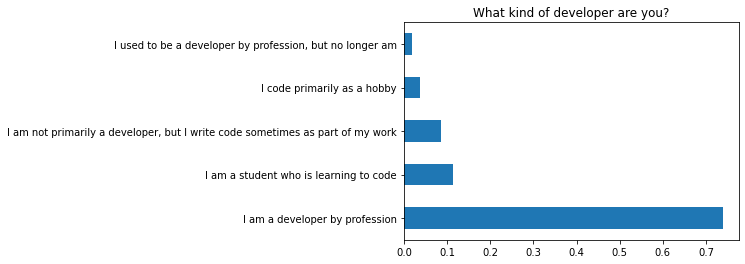

In [90]:
main_branch = df['MainBranch'].value_counts()


(main_branch/df.shape[0]).plot(kind="barh");
plt.title("What kind of developer are you?");

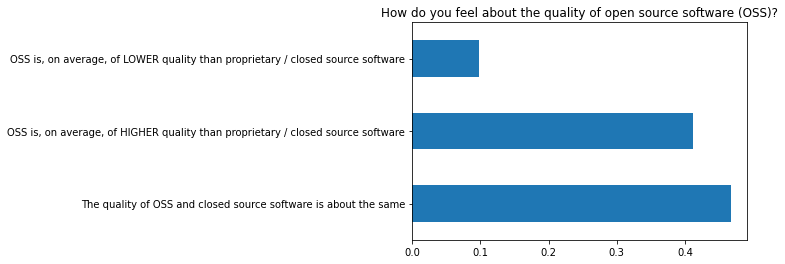

In [91]:
op_source = df['OpenSource'].value_counts()


(op_source/df.shape[0]).plot(kind="barh");
plt.title("How do you feel about the quality of open source software (OSS)?");


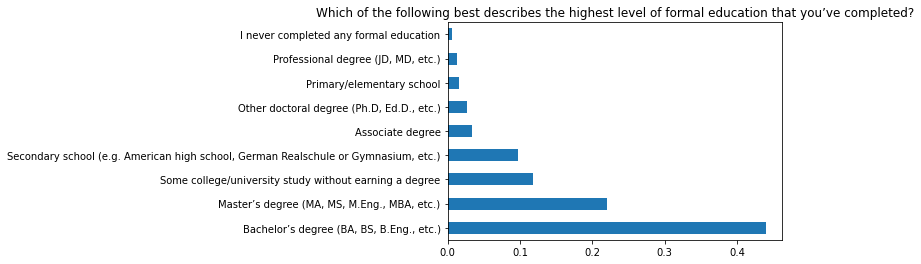

In [92]:
education_level = df['EdLevel'].value_counts()

(education_level/df.shape[0]).plot(kind="barh");
plt.title("Which of the following best describes the highest level of formal education that you’ve completed?");

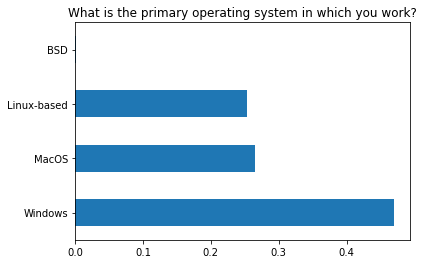

In [93]:
op_system = df['OpSys'].value_counts()

(op_system/df.shape[0]).plot(kind="barh");
plt.title("What is the primary operating system in which you work?");

In [94]:
# Check how many missing values we have on this column
open_source['LanguageWorkedWith'].isnull().sum()

595

In [95]:
languages_worked = open_source['LanguageWorkedWith'].dropna()

In [96]:
def plot_multiple_values(df_col, title):
    '''
    INPUT
    df_col - pandas series with the column to graph 
    title - string with the title of the graph
    
    OUTPUT
    new_df - pandas dataframe with the values count
    '''
    values = {}
    for val in df_col:
        val_list = val.split(';')
        for v in val_list:
            values.update({v: values.get(v, 0) + 1 })
    new_df = pd.DataFrame(pd.Series(values)).reset_index()
    new_df.columns = ['value', 'count']
    new_df.sort_values('count', ascending=False, inplace=True)
    new_df.set_index('value', inplace=True)
    (new_df/new_df.sum()).plot(kind='bar', legend=None);
    plt.title(title);
    plt.show();
    return new_df

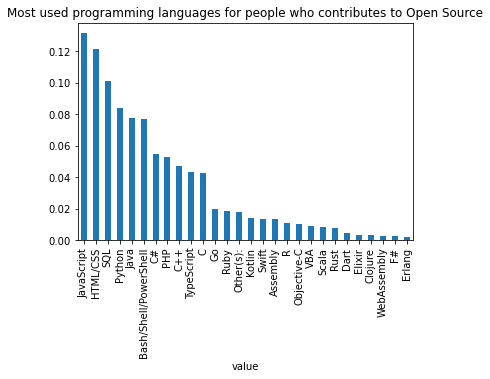

,count
value,
JavaScript,39163
HTML/CSS,36171
SQL,30212
Python,25133
Java,23097
Bash/Shell/PowerShell,23022
C#,16422
PHP,15768
C++,14047


In [97]:
languages = plot_multiple_values(languages_worked, 'Most used programming languages for people who contributes to Open Source')
languages

What dev type contribute to Open Source?

In [98]:
open_source['DevType'].isnull().sum()

4113

In [99]:
dev_type = open_source['DevType'].dropna()

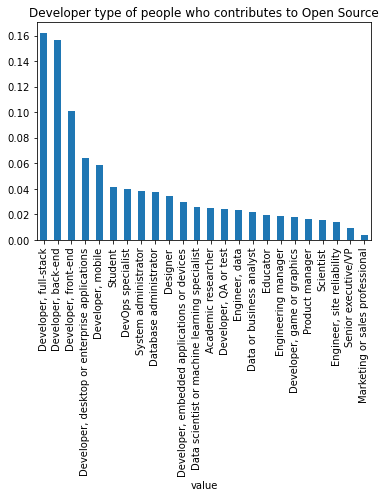

,count
value,
"Developer, full-stack",28437
"Developer, back-end",27490
"Developer, front-end",17772
"Developer, desktop or enterprise applications",11273
"Developer, mobile",10305
Student,7238
DevOps specialist,7048
System administrator,6688
Database administrator,6572


In [100]:
dev_types = plot_multiple_values(dev_type, 'Developer type of people who contributes to Open Source')
dev_types

## Years of experience processing and analysis

In [101]:
open_source['YearsCode'].isnull().sum()

516

In [102]:
years_code = open_source['YearsCode'].dropna()

In [103]:
years_exp = years_code.replace('Less than 1 year', 0)
years_exp = years_exp.replace('More than 50 years', 51)

In [104]:
years_experience = years_exp.astype(int)

In [105]:
experience = pd.DataFrame()

In [106]:
bins= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
labels = ['Less than 5 years','5 to 9 years','10 to 14 years','15 to 19 years','20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years','40 to 44 years','45 to 49 years','50 years or more']
experience['YearsExperience'] = pd.cut(years_experience, bins=bins, labels=labels, right=False)
experience.head(15)

,YearsExperience
4,15 to 19 years
7,5 to 9 years
8,10 to 14 years
9,10 to 14 years
10,Less than 5 years
12,15 to 19 years
13,10 to 14 years
16,5 to 9 years
17,10 to 14 years
20,5 to 9 years


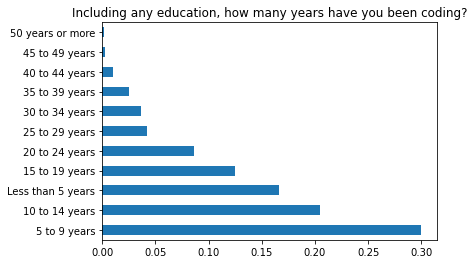

In [107]:
years_exper = experience['YearsExperience'].value_counts()

(years_exper/experience.shape[0]).plot(kind="barh");
plt.title("Including any education, how many years have you been coding?");

# Model

As we want to know if a person is likelily to contribute to Open Source we need to format the column OpenSourcer to create the targe column having: 
- 0 for not contributind
- 1 for contributing

In [108]:
new_df = df[['OpenSource', 'Employment', 'EdLevel', 'CareerSat', 'OpenSourcer', 'Hobbyist', 'SOFindAnswer', 'YearsCode', 'CodeRevHrs', 'CodeRev', 'OpSys', 'SOComm']]

In [109]:
target_df = new_df.copy()

In [110]:
target_df['Target'] = np.where(target_df['OpenSourcer'].str.contains('Never'), 0, 1)

In [111]:
target_df.head()

,OpenSource,Employment,EdLevel,CareerSat,OpenSourcer,Hobbyist,SOFindAnswer,YearsCode,CodeRevHrs,CodeRev,OpSys,SOComm,Target
0,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",Primary/elementary school,NaN,Never,Yes,3-5 times per week,4,NaN,NaN,Windows,Neutral,0
1,The quality of OSS and closed source software is about the same,"Not employed, but looking for work","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Less than once per year,No,3-5 times per week,NaN,NaN,NaN,Windows,"Yes, somewhat",1
2,The quality of OSS and closed source software is about the same,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Slightly satisfied,Never,Yes,6-10 times per week,3,NaN,No,Linux-based,Neutral,0
3,The quality of OSS and closed source software is about the same,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,Never,No,1-2 times per week,3,NaN,No,Windows,"No, not really",0
4,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very dissatisfied,Once a month or more often,Yes,More than 10 times per week,16,NaN,"Yes, because I see value in code review",Linux-based,"Yes, definitely",1


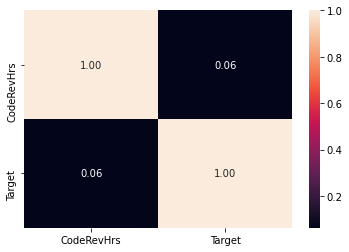

In [112]:
sns.heatmap(target_df.corr(), annot=True, fmt=".2f");

As we only have 1 numerical variable this graph doesn't help us to get conclutions

In [113]:
target_df.isnull().sum(axis = 0)

OpenSource       2041
Employment       1702
EdLevel          2493
CareerSat       16036
OpenSourcer         0
Hobbyist            0
SOFindAnswer     1067
YearsCode         945
CodeRevHrs      39093
CodeRev         18493
OpSys            1032
SOComm            752
Target              0
dtype: int64

In [114]:
target_df.dtypes

OpenSource       object
Employment       object
EdLevel          object
CareerSat        object
OpenSourcer      object
Hobbyist         object
SOFindAnswer     object
YearsCode        object
CodeRevHrs      float64
CodeRev          object
OpSys            object
SOComm           object
Target            int64
dtype: object

In [115]:
target_df = target_df.drop(['OpenSourcer'], axis=1)

In [116]:
target_df.head()

,OpenSource,Employment,EdLevel,CareerSat,Hobbyist,SOFindAnswer,YearsCode,CodeRevHrs,CodeRev,OpSys,SOComm,Target
0,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",Primary/elementary school,NaN,Yes,3-5 times per week,4,NaN,NaN,Windows,Neutral,0
1,The quality of OSS and closed source software is about the same,"Not employed, but looking for work","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,No,3-5 times per week,NaN,NaN,NaN,Windows,"Yes, somewhat",1
2,The quality of OSS and closed source software is about the same,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Slightly satisfied,Yes,6-10 times per week,3,NaN,No,Linux-based,Neutral,0
3,The quality of OSS and closed source software is about the same,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,No,1-2 times per week,3,NaN,No,Windows,"No, not really",0
4,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very dissatisfied,Yes,More than 10 times per week,16,NaN,"Yes, because I see value in code review",Linux-based,"Yes, definitely",1


In [117]:
target_df.shape

(88883, 12)

In [118]:
clean_df = target_df.dropna(subset=['OpenSource', 'Employment', 'EdLevel', 'CareerSat', 'Hobbyist', 'SOFindAnswer', 'YearsCode', 'CodeRev', 'OpSys', 'SOComm'])

In [119]:
clean_df.shape

(66872, 12)

Here we are going to make some processing to add the Years of Experience variable

In [120]:
experience_df = clean_df.copy()

In [121]:
years_code = experience_df['YearsCode']

In [122]:
experience_df['YearsCode'] = years_code.replace('Less than 1 year', 0)
experience_df['YearsCode'] = years_code.replace('More than 50 years', 51)
years_code_clean = experience_df['YearsCode'].astype(int)
bins= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
labels = ['Less than 5 years','5 to 9 years','10 to 14 years','15 to 19 years','20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years','40 to 44 years','45 to 49 years','50 years or more']
experience_df['YearsExperience'] = pd.cut(years_code_clean, bins=bins, labels=labels, right=False)

In [123]:
prepared_df = experience_df.drop(['YearsCode'], axis=1)

In [124]:
prepared_df.dtypes

OpenSource           object
Employment           object
EdLevel              object
CareerSat            object
Hobbyist             object
SOFindAnswer         object
CodeRevHrs          float64
CodeRev              object
OpSys                object
SOComm               object
Target                int64
YearsExperience    category
dtype: object

In [125]:
def clean_data(df, target):
    '''
    INPUT
    df - pandas dataframe 
    target - a string holding name of the target column
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    '''
    drop_target_df = df.dropna(subset=[target], axis=0)
    y = drop_target_df[target]
    X = drop_target_df.drop([target], axis=1)
    
    cat_df = X.select_dtypes(include=['object', 'category']).copy()
    X_cat_cols = cat_df.columns
    
    X_num = X.drop(X_cat_cols, axis=1)
    X_cat = X[X_cat_cols]

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df_num = X_num.apply(fill_mean, axis=0)
            
    X_dumm = pd.get_dummies(X_cat, prefix=X_cat_cols, prefix_sep='_', drop_first=True)
    X = pd.concat([X_dumm, df_num], axis=1)
    
    return X, y

In [126]:
#Use the function to create X and y
X, y = clean_data(prepared_df, 'Target')

In [127]:
X.shape

(66872, 42)

In [128]:
def fit_linear_mod(X, y, test_size=.3, rand_state=42):
    '''
    INPUT:
    X - a dataframe holding all the variables of interest
    y - a numpy Array holding the target column 
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=rand_state) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
        
    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 
    test_score = r2_score(y_test, y_test_preds)
    #predict in the training data
    y_train_preds = lm_model.predict(X_train) 
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [129]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(X, y)

In [130]:
print(f'Test Score: {test_score}')
print(f'Train Score: {train_score}')

Test Score: 0.1339663793318403
Train Score: 0.12638056724236346


In [131]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)

,est_int,coefs,abs_coefs
16,Hobbyist_Yes,0.203082,0.203082
25,OpSys_Windows,-0.168161,0.168161
36,YearsExperience_30 to 34 years,0.167847,0.167847
35,YearsExperience_25 to 29 years,0.164447,0.164447
33,YearsExperience_15 to 19 years,0.157004,0.157004
39,YearsExperience_45 to 49 years,0.150427,0.150427
34,YearsExperience_20 to 24 years,0.144852,0.144852
38,YearsExperience_40 to 44 years,0.135638,0.135638
37,YearsExperience_35 to 39 years,0.120867,0.120867
32,YearsExperience_10 to 14 years,0.118771,0.118771
